## 2D Synthetic Data

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import cos, sin, pi

t0 = []
for _ in range(1000):
    t0.append([random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)])
    
t1 = []
for _ in range(1000):
    t1.append([random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)])
    
t0 = np.array(t0)
t1 = np.array(t1)

In [2]:
theta = 45 * pi/180

t0x = cos(theta) * t0[:, 0] - sin(theta) * t0[:, 1]
t0y = sin(theta) * t0[:, 0] + cos(theta) * t0[:, 1]

t1x = cos(theta) * t1[:, 0] - sin(theta) * t1[:, 1]
t1y = sin(theta) * t1[:, 0] + cos(theta) * t1[:, 1]


In [3]:
t1x_ = []
t1y_ = []

t1x__ = []
t1y__ = []

for x, y in zip(t1x, t1y):
    
    if x < 0 or y < 0:
        t1x_.append(x)
        t1y_.append(y)
    else:
        t1x__.append(x)
        t1y__.append(y)        

        
# t1x = np.array(t1x__[:20] + t1x_)
# t1y = np.array(t1y__[:20] + t1y_)

t1x = np.array(t1x_)
t1y = np.array(t1y_)

In [15]:
synth_2d_df = pd.DataFrame({'x1': np.concatenate((t0x , t1x)), 'x2': np.concatenate((t0y, t1y)),\
                            't': np.concatenate((np.zeros(1000), np.ones(752))).astype(int)})
synth_2d_df.to_csv('data/synth_2d_df.csv', index=False)

In [19]:
len(t0y)

1000

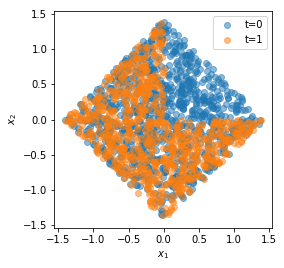

In [18]:
import seaborn as sns
fig, ax = plt.subplots() 

sns.regplot(t0x, t0y, label='t=0', fit_reg=False, scatter_kws={'alpha': 0.5})
sns.regplot(t1x, t1y, label = 't=1', fit_reg=False, scatter_kws={'alpha': 0.5})

# ax.scatter(t0x, t0y, label='t=0')
# ax.scatter(t1x, t1y, label = 't=1')

ax.legend()
ax.set_aspect(aspect='equal')
ax.set_ylabel("$x_2$")
ax.set_xlabel("$x_1$")

ax.grid(False)
plt.show()



In [305]:
ax.get_figure().savefig('scatter.pdf')

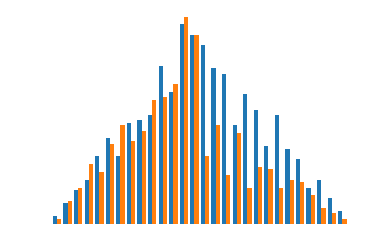

In [276]:
plt.hist([t0x, t1x], bins=np.arange(-1.5, 1.5, 0.1))
plt.axis('off')
plt.savefig('x.pdf')

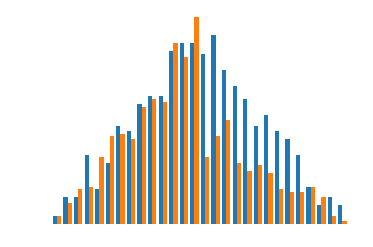

In [277]:
plt.hist([t0y, t1y], bins=np.arange(-1.5, 1.5, 0.1))
plt.axis('off')
plt.savefig('y.pdf')

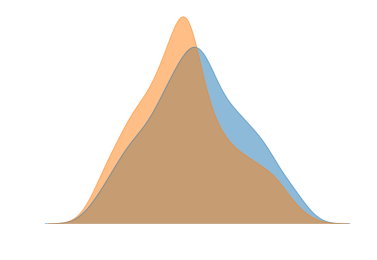

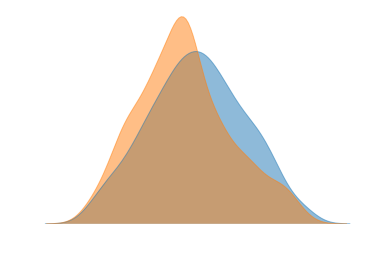

In [309]:
import pandas as pd
dft0 = pd.DataFrame({
    't0x': t0x,
    't0y': t0y,
})
dft1 = pd.DataFrame({
    't1x': t1x,
    't1y': t1y,
})

# dft0['t0x'].plot.kde(legend=False)
# dft1['t1x'].plot.kde(legend=False)
# plt.axis('off')
# plt.show()
# plt.savefig('x.pdf')


import seaborn as sns

sns.distplot(dft0['t0x'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
sns.distplot(dft1['t1x'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
plt.axis('off')
plt.savefig('x.pdf')
plt.show()

sns.distplot(dft0['t0y'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
sns.distplot(dft1['t1y'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
plt.axis('off')
plt.savefig('y.pdf')

# dft0['t0y'].plot.kde(legend=False, shade=True)
# dft1['t1y'].plot.kde(legend=False, shade=True)
# plt.axis('off')
# plt.savefig('y.pdf')

## 8D Synthetic data

In [170]:
X1 = np.random.uniform
X2 = np.random.binomial
X3 = np.random.multinomial


n = 10000

def generate_data(n):    

    x1 = X1(-1.0,1.0, n)
    x2 = X1(-10.0,10.0, n)
    x3 = X1(-20.0,0.0, n)
    x4 = X1(20.0,0.0, n)
    x5 = X2(1, 0.3, n)
    x6 = X2(1, 0.7, n)
    x7 = np.argmax(X3(1, [1/6.]*6, n), axis=1)
    x8 = np.argmax(X3(1, [1/10.]*10, n), axis=1)

    ti = np.concatenate((x1.reshape(n, 1), x2.reshape(n, 1), x3.reshape(n, 1), x4.reshape(n, 1), \
                x5.reshape(n, 1), x6.reshape(n, 1), x7.reshape(n, 1), x8.reshape(n, 1)), axis=1)
    return ti

t0 = generate_data(n)
t1 = generate_data(n)

t1_ = t1

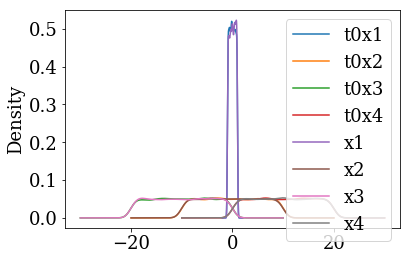

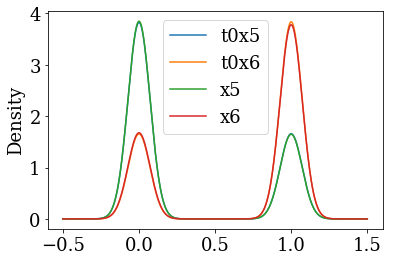

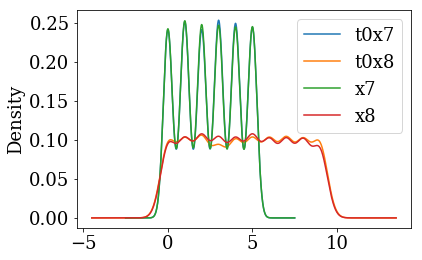

In [171]:
pd.DataFrame({'t0x1': t0[:, 0], 't0x2': t0[:, 1], 't0x3': t0[:, 2], 't0x4': t0[:, 3], \
             'x1': t1[:, 0], 'x2': t1[:, 1], 'x3': t1[:, 2], 'x4': t1[:, 3]}).plot.kde()

pd.DataFrame({'t0x5': t0[:, 4], 't0x6': t0[:, 5], 'x5': t1[:, 4], 'x6': t1[:, 5]}).plot.kde()
pd.DataFrame({'t0x7': t0[:, 6], 't0x8': t0[:, 7], 'x7': t1[:, 6], 'x8': t1[:, 7]}).plot.kde()

In [172]:
from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [173]:
t0_t1 = np.concatenate((t0, t1), axis=0)
t_bin_ = binner.fit_transform(t0_t1[:,:4])
t_bin = np.concatenate((t_bin_, t0_t1[:,4:]), axis=1)


In [174]:
t_bin.shape

(20000, 8)

In [175]:
np.unique(t_bin[len(t0):,:][:, 7])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [176]:
t1_v = []

#x1: 7,8,9 & x3: 3,4,5, & x8: 5,6,7,8 : voilation
for row in t_bin[len(t0):,:]:
    if row[0] < 7 or not (row[2] > 2 and row[2] < 6) or not (row[7] > 4 and row[7] < 9):
        t1_v.append(row)

t1_v = np.array(t1_v)

In [177]:
#8D data

d1 = pd.DataFrame(t_bin[:len(t0),:], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])
d2 = pd.DataFrame(t1_v, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])

d1['y'] = 0
d2['y'] = 1

df = pd.concat([d1, d2], ignore_index=True)

# df.to_csv('synthetic_positivity_data.csv')

In [310]:
# 2D data
t0 = np.concatenate((t0x.reshape(1000, 1), t0y.reshape(1000, 1)), axis=1)
t1 = np.concatenate((t1x.reshape(len(t1x), 1), t1y.reshape(len(t1x), 1)), axis=1)

X = np.concatenate((t0, t1))
y = np.array([0] * len(t0) + [1] * len(t1))

df_2d = pd.concat([pd.DataFrame(X, columns=['x', 'y']), pd.Series(y, name='y_')], axis=1)

In [311]:
df_2d.head()

,x,y,y_
0,-0.289589,-0.623233,0
1,0.419868,-0.044491,0
2,-0.163585,0.376682,0
3,0.830839,-0.138342,0
4,-0.396024,0.709717,0


## Overrule

In [1]:
import sys, os
import numpy as np
sys.path.append('./overlap-code')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, datasets
from sklearn.neighbors import KernelDensity
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from overrule.overrule import OverRule2Stage
from overrule.baselines import knn, marginal, propscore, svm
from overrule.support import SVMSupportEstimator, SupportEstimator
from overrule.overlap import SupportOverlapEstimator
from overrule.ruleset import BCSRulesetEstimator, RulesetEstimator


In [192]:
X.shape

(1399, 2)

Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


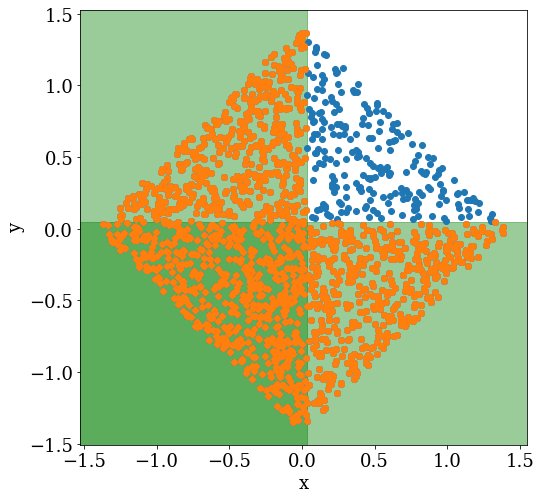

In [322]:
f_cols = ['x', 'y']
D = df_2d.copy()
# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=5)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.9, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.9, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(D[f_cols], D['y_'])

# Get learned rules
rules = M.rules(as_str=True)

# Plot rules
plt.rc('font', size=18, family='serif')
R = M.rules()[1]
O = M.predict(D[f_cols])
    
l = 0
fig, axs = plt.subplots(1,1,figsize=(8,8))

f1 = f_cols[0]
f2 = f_cols[1]

axs.scatter(D[f1], D[f2])
axs.scatter(D.iloc[O==1][f1], D.iloc[O==1][f2])

axs.set_xlabel('x')
axs.set_ylabel('y')


for k in R:
    x0l = D[f1].min()-2
    x0u = D[f1].max()+2
    x1l = D[f2].min()-2
    x1u = D[f2].max()+2
    for a in k:
        if a[0] == f1 and a[1] == '>':
            x0l = a[2]
        if a[0] == f1 and a[1] == '<=':
            x0u = a[2]
        if a[0] == f2 and a[1] == '>':
            x1l = a[2]
        if a[0] == f2 and a[1] == '<=':
            x1u = a[2]

    color = 'g'
    rect = patches.Rectangle((x0l,x1l),x0u-x0l,x1u-x1l,linewidth=1,
                             edgecolor=color, facecolor=color, alpha=.4, zorder=-4)
    axs.add_patch(rect)

        
plt.show()


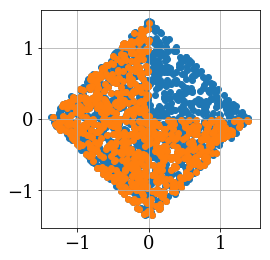

In [320]:
fig, ax = plt.subplots() 

ax.scatter(D[f1], D[f2])
ax.scatter(D[D['y_'] == 1][f1], D[D['y_'] == 1][f2])


ax.set_aspect(aspect='equal')
ax.grid(True)
plt.show()

In [323]:
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

  ()
  ((X[x] <= 0.036))
| ((X[y] <= 0.050))


## Bias scan (2d)

In [3]:
sys.path.append('./KDD_BiasScan')

import pickle as pkl
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import OrderedDict
from multiprocessing.pool import Pool
from multiprocessing import cpu_count
import time

from BiasScan.MDSS import *
import BiasScan


In [51]:
D.head()

,x,y,y_
0,-0.403174,-0.452789,0
1,0.184283,-1.070360,0
2,0.218554,0.088021,0
3,0.078527,-1.130144,0
4,-0.760688,0.073802,0


In [166]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [167]:
# scan_data = pd.read_csv('positivity_data.csv')
# covariates = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
# outcome = 'y'

scan_data = D

clf = KNeighborsClassifier(n_neighbors=10)
covariates = ['x', 'y']
outcome = 'y_'

binn = binner.fit_transform(scan_data[covariates])
scan_data['_x_'] = binn[:, 0]
scan_data['_y_'] = binn[:, 1]
covariates = ['_x_', '_y_']


clf.fit(scan_data[covariates], scan_data['y_'])
y_pred = clf.predict_proba(scan_data[covariates])[:, 1]
scan_data['prob'] = y_pred

scan_data['0.5'] = len(scan_data) * [y.mean()]

domains = {}

for cov in covariates:
    domains[cov] = np.unique(scan_data[cov])
    
observed = 'y_'
expected = '0.5' 

def experimentn(i, seed):
    np.random.seed(seed)
    
    mdscan_data_local = scan_data.copy()
    results = {}
    
    # define scanner
    scanner = MDSS(
        optim_q_mle=bisection_q_mle,
        solver_q_min=bisection_q_min,
        solver_q_max=bisection_q_max,
    )

    # run MDSS
    subset, score = scanner.run_bias_scan(  
        coordinates=mdscan_data_local[covariates],
        probs=mdscan_data_local[expected], 
        outcomes=mdscan_data_local[observed],
        penalty=PENALTY, 
        num_iters=NUM_RESTARTS, 
        direction='negative',
        num_threads=1
    )
        
    return score, subset

NUM_RESTARTS = 5
NUM_EXPERIMENTS = 1
PENALTY = 0.01

num_experiments = NUM_EXPERIMENTS
results = {}
acc = {}

# start time
start = time.time()

# define thread pool
pool = Pool(processes=cpu_count() - 1)

scores = []
seeds = np.random.randint(0, 99999, size=num_experiments)
for i in range(num_experiments):
    scores.append(pool.apply_async(experimentn, (i, seeds[i])))

          
# close thread pool & wait for all jobs to be done
pool.close()
pool.join()

# collect the results
scores = [res.get() for res in scores]
 
# print duration
print("Ellapsed: %.2f" % (time.time() - start))

Ellapsed: 7.86


In [168]:
scores

[(2.6180014903154634, {'_x_': [9.0, 6.0], '_y_': [9.0, 6.0, 7.0]})]

In [55]:
scan_data.head()

,x,y,y_,_x_,_y_,prob,0.5
0,-0.403174,-0.452789,0,3.0,3.0,0.0,0.278499
1,0.184283,-1.070360,0,5.0,1.0,0.2,0.278499
2,0.218554,0.088021,0,5.0,5.0,0.1,0.278499
3,0.078527,-1.130144,0,5.0,0.0,0.5,0.278499
4,-0.760688,0.073802,0,2.0,5.0,0.4,0.278499


Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


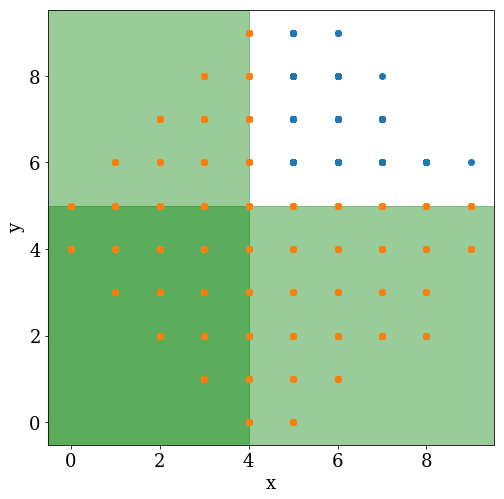

In [56]:
f_cols = ['_x_', '_y_']

# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=10)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.7, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.7, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(D[f_cols], D['y_'])

# Get learned rules
rules = M.rules(as_str=True)

# Plot rules
plt.rc('font', size=18, family='serif')
R = M.rules()[1]
O = M.predict(D[f_cols])
    
l = 0
fig, axs = plt.subplots(1,1,figsize=(8,8))

f1 = f_cols[0]
f2 = f_cols[1]

axs.scatter(D[f1], D[f2])
axs.scatter(D.iloc[O==1][f1], D.iloc[O==1][f2])

axs.set_xlabel('x')
axs.set_ylabel('y')


for k in R:
    x0l = D[f1].min()-2
    x0u = D[f1].max()+2
    x1l = D[f2].min()-2
    x1u = D[f2].max()+2
    for a in k:
        if a[0] == f1 and a[1] == '>':
            x0l = a[2]
        if a[0] == f1 and a[1] == '<=':
            x0u = a[2]
        if a[0] == f2 and a[1] == '>':
            x1l = a[2]
        if a[0] == f2 and a[1] == '<=':
            x1u = a[2]

    color = 'g'
    rect = patches.Rectangle((x0l,x1l),x0u-x0l,x1u-x1l,linewidth=1,
                             edgecolor=color, facecolor=color, alpha=.4, zorder=-4)
    axs.add_patch(rect)

        
plt.show()


In [57]:
rules[1]

'  ([_x_ <= 4.000])\n∨ ([_y_ <= 5.000])'

In [58]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,7.0,6.0,8.0,6.0,0.0,1.0,0.0,9.0,0
1,6.0,3.0,6.0,2.0,0.0,1.0,4.0,6.0,0
2,4.0,0.0,0.0,8.0,0.0,0.0,5.0,9.0,0
3,6.0,3.0,5.0,1.0,0.0,0.0,3.0,9.0,0
4,6.0,3.0,5.0,3.0,1.0,1.0,0.0,0.0,0


## Biasscan 8d

In [180]:
scan_data = df
covariates = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
outcome = 'y'

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(scan_data[covariates], scan_data['y'])
y_pred = clf.predict_proba(scan_data[covariates])[:, 1]
scan_data['prob'] = y_pred

gnb.fit(scan_data[covariates], scan_data['y'])
y_pred_gnb = gnb.predict_proba(scan_data[covariates])[:, 1]
scan_data['prob_gnb'] = y_pred_gnb

scan_data['0.5'] = [df['y'].mean()] * len(scan_data)
domains = {}

for cov in covariates:
    domains[cov] = np.unique(scan_data[cov])
    
observed = 'y'
expected = 'prob_gnb' 

def experimentn(i, seed):
    np.random.seed(seed)
    
    mdscan_data_local = scan_data.copy()
    results = {}
    
    # define scanner
    scanner = MDSS(
        optim_q_mle=bisection_q_mle,
        solver_q_min=bisection_q_min,
        solver_q_max=bisection_q_max,
    )

    # run MDSS
    subset, score = scanner.run_bias_scan(  
        coordinates=mdscan_data_local[covariates],
        probs=mdscan_data_local[expected], 
        outcomes=mdscan_data_local[observed],
        penalty=PENALTY, 
        num_iters=NUM_RESTARTS, 
        direction='negative',
        num_threads=1
    )
        
    return score, subset

NUM_RESTARTS = 50
NUM_EXPERIMENTS = 1
PENALTY = 0.000005

num_experiments = NUM_EXPERIMENTS
results = {}
acc = {}

# start time
start = time.time()

# define thread pool
pool = Pool(processes=cpu_count() - 1)

scores = []
seeds = np.random.randint(0, 99999, size=num_experiments)
for i in range(num_experiments):
    scores.append(pool.apply_async(experimentn, (i, seeds[i])))

          
# close thread pool & wait for all jobs to be done
pool.close()
pool.join()

# collect the results
scores = [res.get() for res in scores]
 
# print duration
print("Ellapsed: %.2f" % (time.time() - start))

Ellapsed: 98.42


In [179]:
scores

[(230.72181271137546,
  {'x1': [7.0, 8.0, 9.0], 'x3': [3.0, 4.0, 5.0], 'x8': [8.0, 5.0, 6.0, 7.0]})]

In [181]:
scores

[(217.90794369912243,
  {'x1': [7.0, 8.0, 9.0], 'x3': [3.0, 4.0, 5.0], 'x8': [8.0, 5.0, 6.0, 7.0]})]

## Overrule 8d

Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


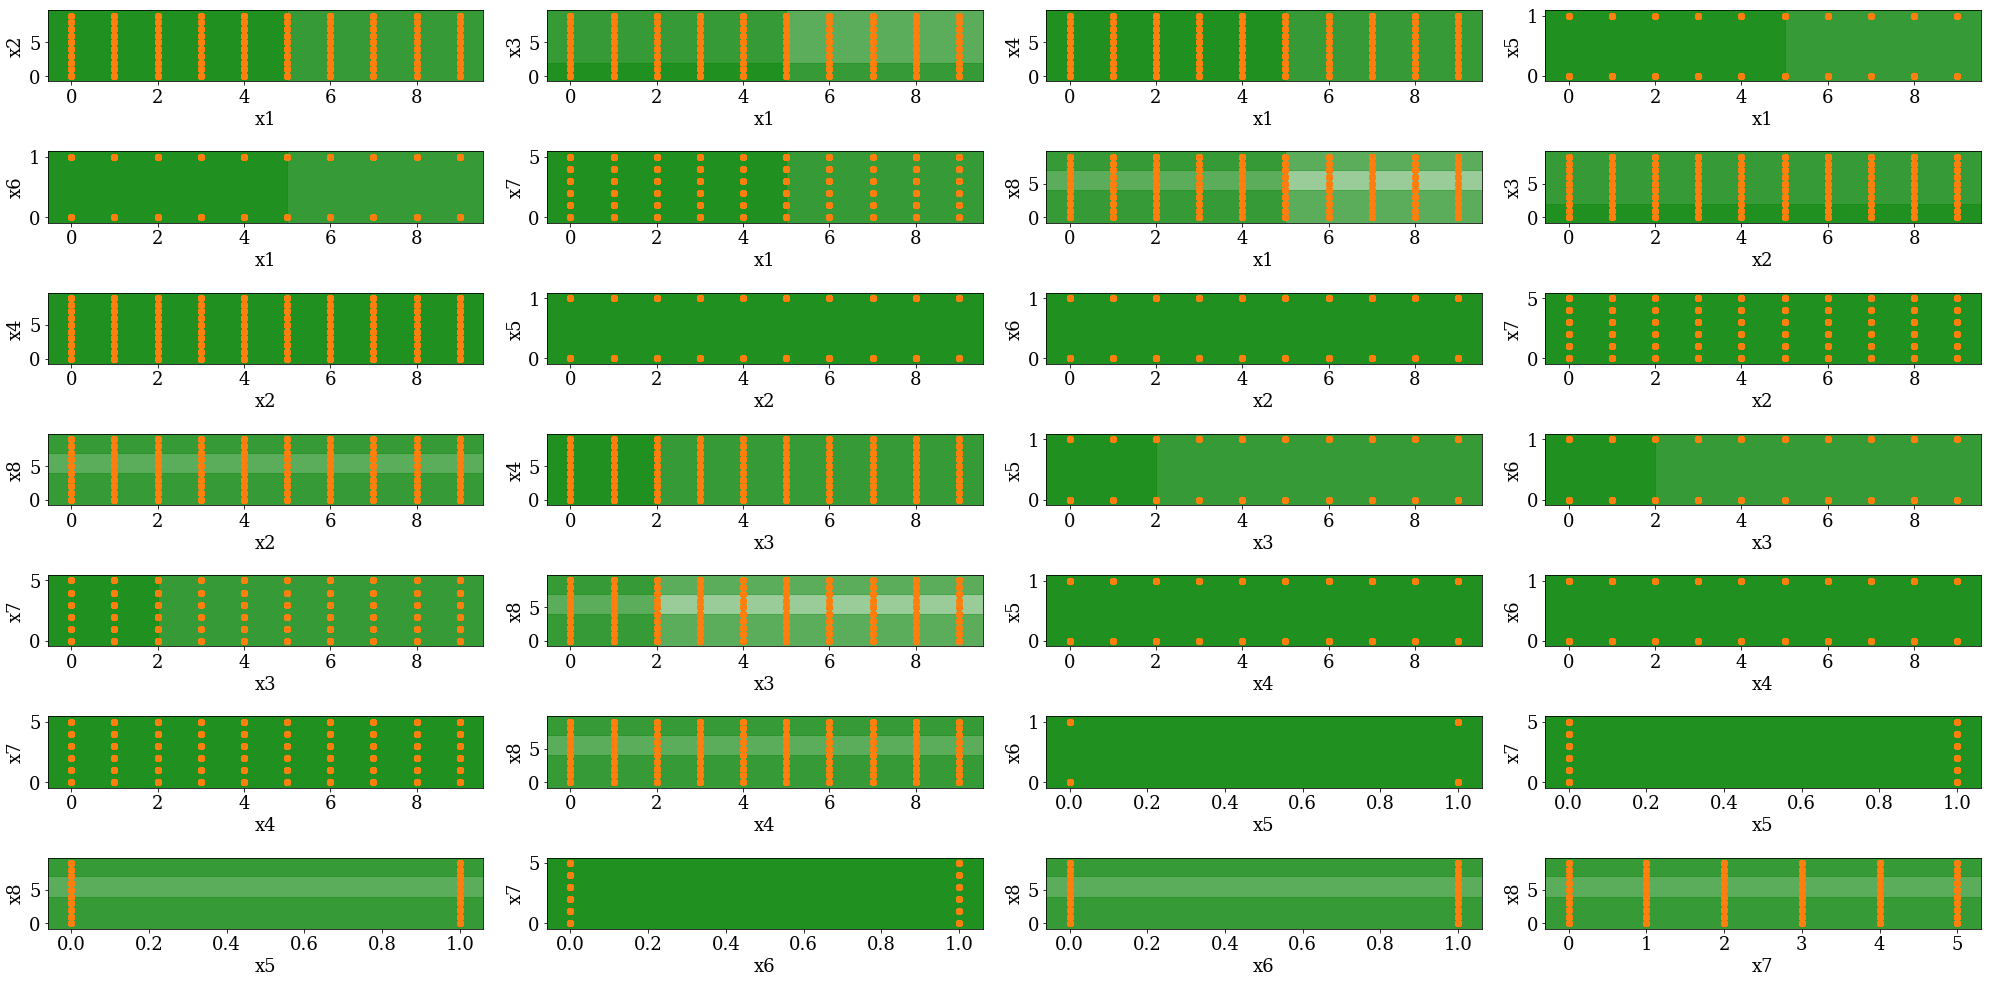

In [61]:
f_cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=10)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.7, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.7, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(df[f_cols], df['y'])

# Get learned rules
rules = M.rules(as_str=True)

# Plot rules
plt.rc('font', size=18, family='serif')
R = M.rules()[1]
O = M.predict(df[f_cols])
    
l = 0
fig, axs = plt.subplots(7,4,figsize=(28,14))

for i in range(len(f_cols)):
    for j in range(i+1, len(f_cols)):

        f1 = f_cols[i]
        f2 = f_cols[j]

        axs[int(l/4), l%4].scatter(df[f1], df[f2])
        axs[int(l/4), l%4].scatter(df.iloc[O==1][f1], df.iloc[O==1][f2])

        axs[int(l/4), l%4].set_xlabel(f1)
        axs[int(l/4), l%4].set_ylabel(f2)

        for k in R:
            x0l = df[f1].min()-2
            x0u = df[f1].max()+2
            x1l = df[f2].min()-2
            x1u = df[f2].max()+2
            for a in k:
                if a[0] == f1 and a[1] == '>':
                    x0l = a[2]
                if a[0] == f1 and a[1] == '<=':
                    x0u = a[2]
                if a[0] == f2 and a[1] == '>':
                    x1l = a[2]
                if a[0] == f2 and a[1] == '<=':
                    x1u = a[2]

            color = 'g'
            rect = patches.Rectangle((x0l,x1l),x0u-x0l,x1u-x1l,linewidth=1,
                                     edgecolor=color, facecolor=color, alpha=.4, zorder=-4)
            axs[int(l/4), l%4].add_patch(rect)
        l += 1

plt.tight_layout()        
plt.show()


In [80]:
rules

([[]],
 [[('x1', '<=', 5.0)],
  [('x3', '<=', 2.0)],
  [('x8', '<=', 4.0)],
  [('x8', '>', 7.0)]])